<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 11</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

In [1]:
using PyPlot;

## Ejercicio 1

El método de Euler sirve para obtener una solución aproximada de la ecuación diferencial:

$$\frac{dx}{dt}=f(x,t)$$

Implementando la fórmula de recurrencia siguiente:

$$x_{k+1}=x_{k}+hf(x_{k},t_{k}),$$

en donde $x_{k}$ es la aproximación de $x(t_{k})$ y $t_{k}=t_{0}+hk$. Como todo ecuación diferencial de primer orden necesitamos una condición inicial, la cual está dada por $x_{0}=x(t_{0})$.

In [2]:
function metodo_euler(f,x0,listt)
    
    n = length(listt)            # Se guarda el número de puntos en los que se discretiza el intervalo.
    listx = zeros(n)             # Se crea una lista en donde se guardaran las x_{k} del método.
    listx[1] = x0                # La primera entrada es la condición inicial.
    h = listt[2]-listt[1]        # El paso que induce listt para el método.
    for i in 1:n-1
        listx[i+1] = listx[i] + h*f(listx[i],listt[i])   # Método de Euler.
    end
    
    return listx                 # La salida es la lista de las x_{k}.
    
end;

Con `metodo_euler` vamos a obtener solución a la ecuación diferencial:

$$\frac{dx}{dt}=-2.5x, \: x_{0}=x(0)=1\text{ y }2, \text{ y } t\in(0,8),$$

para los pasos $h=1.0,0.5,0.2,0.01$. Para observar la convergencia del método se comparará con la solución exacta que es:

$$x(t)=x_{0}e^{-2.5t}$$

In [3]:
f(x,t)=-2.5x;

In [4]:
listt1=0:1:8;                  # Discretización del intervalo [0,8] con paso 1.
S11=metodo_euler(f,1,listt1);  # Condición inicial x0=1.

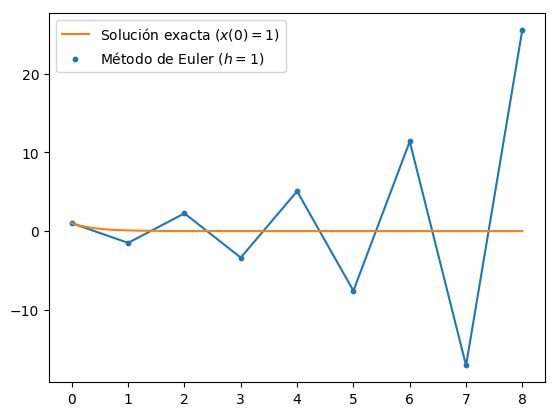

In [5]:
scatter(listt1,S11,label=L"Método de Euler ($h=1$)",s=10)
plot(listt1,S11)
t = linspace(0,8,100)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show();

In [6]:
listt2=0:0.5:8;                # Discretización del intervalo [0,8] con paso 0.5.
listt3=0:0.2:8;                # Discretización del intervalo [0,8] con paso 0.2.
listt4=0:0.01:8;               # Discretización del intervalo [0,8] con paso 0.01.
S12=metodo_euler(f,1,listt2);
S13=metodo_euler(f,1,listt3);
S14=metodo_euler(f,1,listt4);

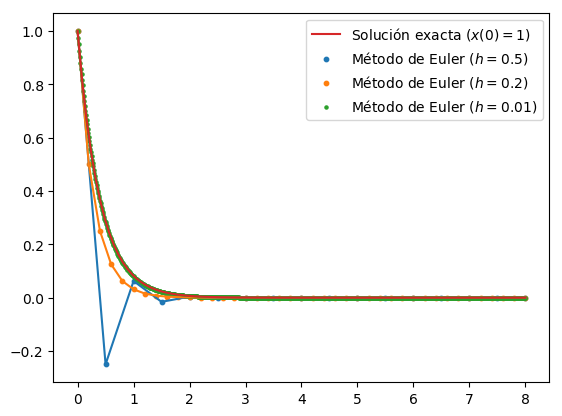

In [7]:
scatter(listt2,S12,label=L"Método de Euler ($h=0.5$)",s=10)
plot(listt2,S12)
scatter(listt3,S13,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listt3,S13)
scatter(listt4,S14,label=L"Método de Euler ($h=0.01$)",s=5)
plot(listt4,S14)
t = linspace(0,8,100)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show();

In [8]:
S21=metodo_euler(f,2,listt1);  # Condición inicial x0=2.

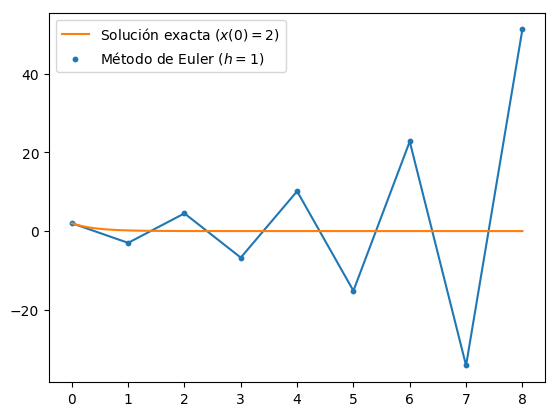

In [9]:
scatter(listt1,S21,label=L"Método de Euler ($h=1$)",s=10)
plot(listt1,S21)
t = linspace(0,8,100)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=2$)")
legend()
show();

In [10]:
S22=metodo_euler(f,2,listt2);
S23=metodo_euler(f,2,listt3);
S24=metodo_euler(f,2,listt4);

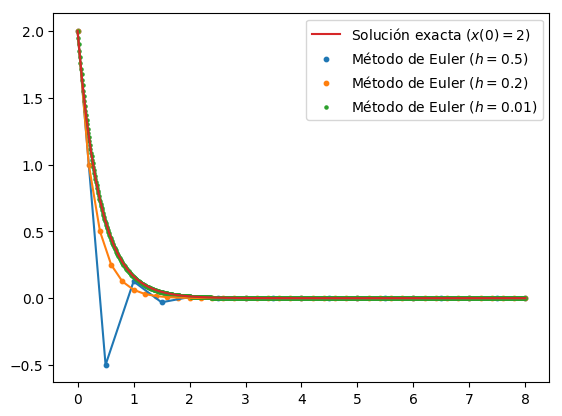

In [11]:
scatter(listt2,S22,label=L"Método de Euler ($h=0.5$)",s=10)
plot(listt2,S22)
scatter(listt3,S23,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listt3,S23)
scatter(listt4,S24,label=L"Método de Euler ($h=0.01$)",s=5)
plot(listt4,S24)
t = linspace(0,8,100)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=2$)")
legend()
show();

## Ejercicio 2

La ecuación diferencial:

$$\ddot{x}=-kx,\:k>0$$

nos dice que la aceleración de un sistema $\ddot{x}$ es proporcional a su posición $x$ respecto a un origen, dicha aceleración está dirigida al origen, i.e. que va en sentido opuesto al crecimiento de la posición. El efecto resultante es que el sistema oscila en torno al origen como punto de equilibrio.

Para conocer la solución general, proponemos la solución $x(t)=e^{rt}$, por lo que la ecuación característica es:

$$r^{2}+k=0,$$

cuyas soluciones son $r=\pm i\sqrt{k}$. Por lo que la solución general es:

$$x(t)=c_{1}e^{i\sqrt{k}t}+c_{2}e^{-i\sqrt{k}t}.$$

Así cualquier solución se puede obtener como combinación lineal de las dos anteriores exponenciales, en particular para $c_{1}=c_{2}=\frac{1}{2}$ se tiene que:

$$x_{1}(t)=\cos\left(\sqrt{k}t\right)$$

es solución de la ecuación diferencial; para $c_{1}=-c_{2}=\frac{1}{2i}$ se concluye que:

$$x_{2}(t)=\mathrm{sen}\left(\sqrt{k}t\right)$$

también es solución, y dado que $\cos$ y $\mathrm{sen}$ son linealmente independientes, entonces la solución general a esta ecuación diferencial se puede escribir (ya incluyendo las condiciones iniciales) como:

$$x(t)=x(0)\cos\left(\sqrt{k}t\right)+\frac{\dot{x}(0)}{\sqrt{k}}\:\mathrm{sen}\left(\sqrt{k}t\right)$$

## Ejercicio 3

En la ecuación diferencial:

$$\ddot{x}=-kx,\:k>0$$

Si tomamos a $u(t)=\dot{x}(t)$, entonces $u(0)=x'(0)$ y $\dot{u}(t)=\ddot{x}(t)=-kx(t)$, es decir que tenemos el sistema de ecuaciones diferenciales de primer orden:

$$\left\{\begin{array}{ll}
\dot{x}=u, & x_{0}=x(0)\\
\dot{u}=-kx, & u_{0}=\dot{x}(0)
\end{array}\right.$$

Con este sistema es posible definir una ecuación diferencial vectorial: Sea $\mathbf{x}(t)=(x(t),u(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t))$, entonces:

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$

con la condición inicial $\mathbf{x}_{0}=\mathbf{x}(0)$. Obsérvese que en general si $\ddot{x}=f(x,\dot{x},t)$ con $x_{0}=x(t_{0})$ y $\dot{x}_{0}=\dot{x}(t_{0})$ siempre podemos hacer $u=\dot{x}$ y así $\dot{u}=f(x,u,t)$, por lo tanto, y según la ecuación diferencial vectorial, al aplicar el método de Euler, se tiene que:

$$\left\{\begin{array}{ll}
x_{k+1}=x_{k}+hu_{k}, & x_{0}=x(t_{0})\\
u_{k+1}=u_{k}+hf(x_{k},u_{k},t_{k}), & u_{0}=\dot{x}(t_{0})
\end{array}\right.$$

Esto último sirve para implementar el método de Euler para ecuaciones diferenciales de segundo orden.

## Ejercicio 4

Se obtiene la solución numérica a la ecuación:

$$\ddot{x}=-kx,\:k>0\text{ para }t\in(0,2\pi)$$

In [12]:
function metodo_euler2(f,x0,u0,listt)
    
    n = length(listt)            # Se guarda el número de puntos en los que se discretiza el intervalo.
    listx = zeros(n)             # Se crea una lista en donde se guardaran las x_{k} del método.
    listu = zeros(n)             # Se crea una lista en donde se guardaran las u_{k}=x'_{k} del método.
    listx[1] = x0                # La primera entrada es la condición inicial x0.
    listu[1] = u0                # La primera entrada es la condición inicial u0=x'_{0}.
    h = listt[2]-listt[1]        # El paso que induce listt para el método.
    for i in 1:n-1
        listx[i+1] = listx[i] + h*listu[i]                       # Método de Euler aplicado a x.
        listu[i+1] = listu[i] + h*f(listx[i],listu[i],listt[i])  # Método de Euler aplicado a u.
    end
    
    return listx
    
end;

Para $k=4$, $x(0)=3$ y $\dot{x}(0)=5$:

In [13]:
f(x,u,t)=-4x;

In [14]:
listt_1=0:0.2:2pi;
listt_2=0:0.1:2pi;
listt_3=0:0.01:2pi;
E1=metodo_euler2(f,3,5,listt_1);
E2=metodo_euler2(f,3,5,listt_2);
E3=metodo_euler2(f,3,5,listt_3);

In [15]:
solution(t)=3*cos(2t)+(5/2)*sin(2t);

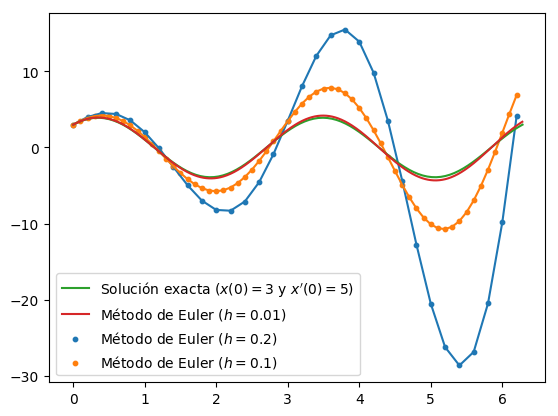

In [16]:
scatter(listt_1,E1,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listt_1,E1)
scatter(listt_2,E2,label=L"Método de Euler ($h=0.1$)",s=10)
plot(listt_2,E2)
t = linspace(0,2pi,100)
plot(t,solution.(t),label=L"Solución exacta ($x(0)=3$ y $x'(0)=5$)")
plot(listt_3,E3,label=L"Método de Euler ($h=0.01$)")
legend()
show();

## Ejercicio 5

Resolviendo la ecuación diferencial:

$$\frac{dx}{dt}=\frac{2x-18 t}{1+t},$$

con la condición inicial $x(0)=4$. Se sabe que la solución es $x(t)=-5t^{2}+8t+4$.

Dado que es una ecuación diferencial de primer orden, podemos usar `metodo_euler`.

In [17]:
f(x,t)=(2x-18t)/(1+t);

In [18]:
listt_4=0:0.2:3;
listt_5=0:0.1:3;
listt_6=0:0.01:3;
D1=metodo_euler(f,4,listt_4);
D2=metodo_euler(f,4,listt_5);
D3=metodo_euler(f,4,listt_6);

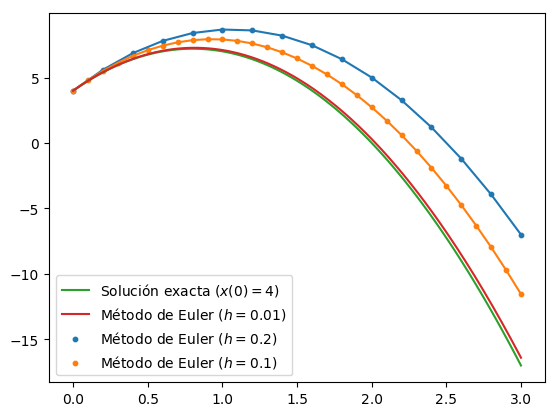

In [19]:
scatter(listt_4,D1,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listt_4,D1)
scatter(listt_5,D2,label=L"Método de Euler ($h=0.1$)",s=10)
plot(listt_5,D2)
t = linspace(0,3,100)
plot(t,-5t.^2+8t+4,label=L"Solución exacta ($x(0)=4$)")
plot(listt_6,D3,label=L"Método de Euler ($h=0.01$)")
legend()
show();

Como se observa, al resolver numéricamente la ecuación diferencial anterior con el método de Euler, a pesar de que la solución es un polinomio, el método de Euler comienza a necesitar un paso $h$ pequeño para que aproxime más o menos la curva solución.

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>